# Application Classes for Optimization Problems

## Introduction

We introduce application classes for the following optimization problems so that users can easily try various optimization problems on quantum computers.

1. Exact cover problem
  - Given a collection of subsets of items, find a subcollection such that each item is covered exactly once.
2. Knapsack problem
  - Given a set of items, find a subset of items such that the total weight is within the capacity and the total value is maximized.
3. Number partition problem
  - Given a multiset of positive integers, find a partition of the multiset into two subsets such that the sums of the subsets are equal.
4. Set packing problem
  - Given a collection of subsets of items, find a subcollection such that all subsets of the subcollection are pairwise disjoint and the number of items in the subcollection is maximized.

Graph problems

5. Clique problem
  - Given an undirected graph, find a subset of nodes with a specified number or the maximum number such that the induced subgraph is complete.
6. Graph partition problem
  - Given an undirected graph, find a partition into two components whose sizes are equal such that the total capacity of the edges between the two components is minimized.
7. Max-cut problem
  - Given an undirected graph, find a partition of nodes into two subsets such that the total weight of the edges between the two subsets is maximized. 
8. Stable set problem
  - Given an undirected graph, find a subset of nodes such that no edge connects the nodes in the subset and the number of nodes is maximized.
9. Traveling salesman problem
  - Given a graph, find a route with the minimum distance such that the route visits each city exactly once.
10. Vehicle routing problem
  - Given a graph, a depot node, and the number of vehicles (routes), find a set of routes such that each node is covered exactly once except the depot and the total distance of the routes is minimized.
11. Vertex cover problem
  - Given an undirected graph, find a subset of nodes with the minimum size such that each edge has at least one endpoint in the subsets.

The application classes for graph problems (`GraphOptimizationApplication`) provide a functionality to draw graphs of an instance and a result.
Note that you need to install `matplotlib` beforehand to utilize the functionality.

We introduce examples of the vertex cover problem and the knapsack problem in this page.

Examples of the max-cut problem and the traveling salesman problem are available in [Max-Cut and Traveling Salesman Problem](06_examples_max_cut_and_tsp.ipynb).

We first import packages necessary for application classes.

In [1]:
from qiskit.primitives import StatevectorSampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.minimum_eigensolvers import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.optimizers import COBYLA
from qiskit_optimization.utils import algorithm_globals

/tmp/ipykernel_16661/1976341966.py:1: DeprecationWarning: Using Qiskit with Python 3.9 is deprecated as of the 2.1.0 release. Support for running Qiskit with Python 3.9 will be removed in the 2.3.0 release, which coincides with when Python 3.9 goes end of life.
  from qiskit.primitives import StatevectorSampler


## Vertex cover problem

We introduce the application class for the vertex cover problem as an example of graph problems.
Given an undirected graph, the vertex cover problem asks us to find a subset of nodes with the minimum size such that all edges are covered by any node selected.

We import the application class `VertexCover` for the vertex cover problem and `networkx` to generate a random graph.


In [2]:
import networkx as nx
from qiskit_optimization.applications.vertex_cover import VertexCover

seed = 123
algorithm_globals.random_seed = seed

In [3]:
graph = nx.random_regular_graph(d=3, n=6, seed=seed)
pos = nx.spring_layout(graph, seed=seed)

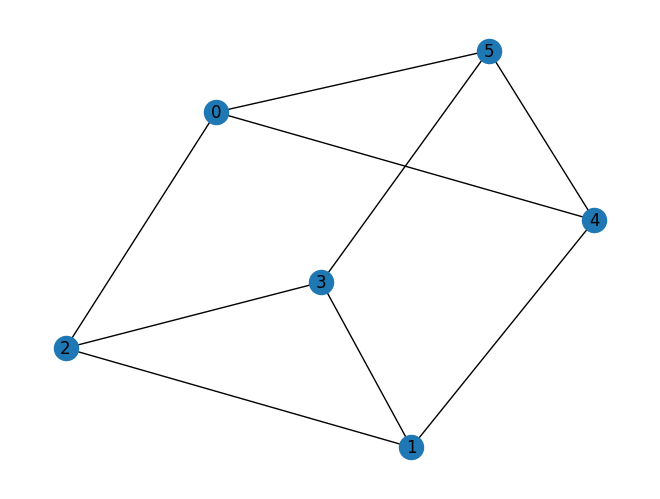

In [4]:
prob = VertexCover(graph)
prob.draw(pos=pos)

`VertexCover` takes a graph as an instance and `to_quadratic_program` generates a corresponding `QuadraticProgram` of the instance of the vertex cover problem.

In [5]:
qp = prob.to_quadratic_program()
print(qp.prettyprint())

Problem name: Vertex cover

Minimize
  x_0 + x_1 + x_2 + x_3 + x_4 + x_5

Subject to
  Linear constraints (9)
    x_1 + x_2 >= 1  'c0'
    x_1 + x_4 >= 1  'c1'
    x_1 + x_3 >= 1  'c2'
    x_2 + x_3 >= 1  'c3'
    x_0 + x_2 >= 1  'c4'
    x_0 + x_4 >= 1  'c5'
    x_0 + x_5 >= 1  'c6'
    x_4 + x_5 >= 1  'c7'
    x_3 + x_5 >= 1  'c8'

  Binary variables (6)
    x_0 x_1 x_2 x_3 x_4 x_5



You can solve the problem as follows. `NumPyMinimumEigensolver` finds the minimum eigen vector. You can also apply QAOA. Note that the solution by QAOA is not always optimal.

objective function value: 4.0
variable values: x_0=0.0, x_1=0.0, x_2=1.0, x_3=1.0, x_4=1.0, x_5=1.0
status: SUCCESS

solution: [2, 3, 4, 5]


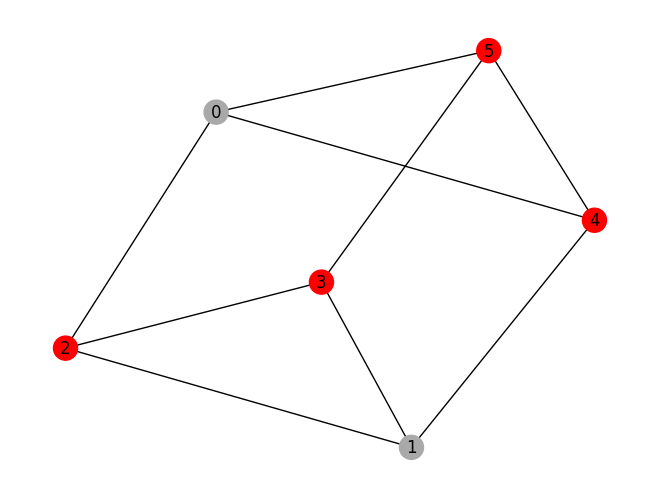

In [6]:
# Numpy Eigensolver
meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
result = meo.solve(qp)
print(result.prettyprint())
print("\nsolution:", prob.interpret(result))
prob.draw(result, pos=pos)

objective function value: 4.0
variable values: x_0=0.0, x_1=1.0, x_2=1.0, x_3=0.0, x_4=1.0, x_5=1.0
status: SUCCESS

solution: [1, 2, 4, 5]

time: 0.27957653999328613


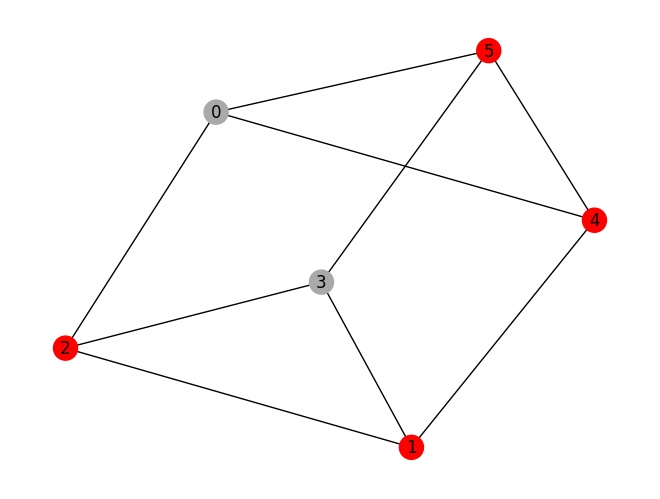

In [7]:
# QAOA
meo = MinimumEigenOptimizer(
    min_eigen_solver=QAOA(reps=1, sampler=StatevectorSampler(seed=123), optimizer=COBYLA())
)
result = meo.solve(qp)
print(result.prettyprint())
print("\nsolution:", prob.interpret(result))
print("\ntime:", result.min_eigen_solver_result.optimizer_time)
prob.draw(result, pos=pos)

## Knapsack problem

The knapsack problem asks us to find a combination of items such that the total weight is within the capacity of the knapsack and maximize the total value of the items.
The following examples solve an instance of the knapsack problem with 5 items by Numpy eigensolver and QAOA.

In [8]:
from qiskit_optimization.applications import Knapsack

In [9]:
prob = Knapsack(values=[3, 4, 5, 6, 7], weights=[2, 3, 4, 5, 6], max_weight=10)
qp = prob.to_quadratic_program()
print(qp.prettyprint())

Problem name: Knapsack

Maximize
  3*x_0 + 4*x_1 + 5*x_2 + 6*x_3 + 7*x_4

Subject to
  Linear constraints (1)
    2*x_0 + 3*x_1 + 4*x_2 + 5*x_3 + 6*x_4 <= 10  'c0'

  Binary variables (5)
    x_0 x_1 x_2 x_3 x_4



In [10]:
# Numpy Eigensolver
meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
result = meo.solve(qp)
print(result.prettyprint())
print("\nsolution:", prob.interpret(result))

objective function value: 13.0
variable values: x_0=1.0, x_1=1.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

solution: [0, 1, 3]


In [11]:
# QAOA
meo = MinimumEigenOptimizer(
    min_eigen_solver=QAOA(reps=1, sampler=StatevectorSampler(seed=123), optimizer=COBYLA())
)
result = meo.solve(qp)
print(result.prettyprint())
print("\nsolution:", prob.interpret(result))
print("\ntime:", result.min_eigen_solver_result.optimizer_time)

objective function value: 13.0
variable values: x_0=1.0, x_1=1.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

solution: [0, 1, 3]

time: 0.4461205005645752


## How to check the Hamiltonian

If you want to check the actual Hamiltonian generated from your problem instance, you need to apply a converter as follows.

In [12]:
from qiskit_optimization.converters import QuadraticProgramToQubo

In [13]:
# the same knapsack problem instance as in the previous section
prob = Knapsack(values=[3, 4, 5, 6, 7], weights=[2, 3, 4, 5, 6], max_weight=10)
qp = prob.to_quadratic_program()
print(qp.prettyprint())

Problem name: Knapsack

Maximize
  3*x_0 + 4*x_1 + 5*x_2 + 6*x_3 + 7*x_4

Subject to
  Linear constraints (1)
    2*x_0 + 3*x_1 + 4*x_2 + 5*x_3 + 6*x_4 <= 10  'c0'

  Binary variables (5)
    x_0 x_1 x_2 x_3 x_4



In [14]:
# intermediate QUBO form of the optimization problem
conv = QuadraticProgramToQubo()
qubo = conv.convert(qp)
print(qubo.prettyprint())

Problem name: Knapsack

Minimize
  26*c0@int_slack@0^2 + 104*c0@int_slack@0*c0@int_slack@1
  + 208*c0@int_slack@0*c0@int_slack@2 + 156*c0@int_slack@0*c0@int_slack@3
  + 104*c0@int_slack@1^2 + 416*c0@int_slack@1*c0@int_slack@2
  + 312*c0@int_slack@1*c0@int_slack@3 + 416*c0@int_slack@2^2
  + 624*c0@int_slack@2*c0@int_slack@3 + 234*c0@int_slack@3^2
  + 104*x_0*c0@int_slack@0 + 208*x_0*c0@int_slack@1 + 416*x_0*c0@int_slack@2
  + 312*x_0*c0@int_slack@3 + 104*x_0^2 + 312*x_0*x_1 + 416*x_0*x_2 + 520*x_0*x_3
  + 624*x_0*x_4 + 156*x_1*c0@int_slack@0 + 312*x_1*c0@int_slack@1
  + 624*x_1*c0@int_slack@2 + 468*x_1*c0@int_slack@3 + 234*x_1^2 + 624*x_1*x_2
  + 780*x_1*x_3 + 936*x_1*x_4 + 208*x_2*c0@int_slack@0 + 416*x_2*c0@int_slack@1
  + 832*x_2*c0@int_slack@2 + 624*x_2*c0@int_slack@3 + 416*x_2^2 + 1040*x_2*x_3
  + 1248*x_2*x_4 + 260*x_3*c0@int_slack@0 + 520*x_3*c0@int_slack@1
  + 1040*x_3*c0@int_slack@2 + 780*x_3*c0@int_slack@3 + 650*x_3^2 + 1560*x_3*x_4
  + 312*x_4*c0@int_slack@0 + 624*x_4*c0@int_

In [15]:
# qubit Hamiltonian and offset
op, offset = qubo.to_ising()
print(f"num qubits: {op.num_qubits}, offset: {offset}\n")
print(op)

num qubits: 9, offset: 1417.5

SparsePauliOp(['IIIIIIIIZ', 'IIIIIIIZI', 'IIIIIIZII', 'IIIIIZIII', 'IIIIZIIII', 'IIIZIIIII', 'IIZIIIIII', 'IZIIIIIII', 'ZIIIIIIII', 'IIIIIIIZZ', 'IIIIIIZIZ', 'IIIIIZIIZ', 'IIIIZIIIZ', 'IIIZIIIIZ', 'IIZIIIIIZ', 'IZIIIIIIZ', 'ZIIIIIIIZ', 'IIIIIIZZI', 'IIIIIZIZI', 'IIIIZIIZI', 'IIIZIIIZI', 'IIZIIIIZI', 'IZIIIIIZI', 'ZIIIIIIZI', 'IIIIIZZII', 'IIIIZIZII', 'IIIZIIZII', 'IIZIIIZII', 'IZIIIIZII', 'ZIIIIIZII', 'IIIIZZIII', 'IIIZIZIII', 'IIZIIZIII', 'IZIIIZIII', 'ZIIIIZIII', 'IIIZZIIII', 'IIZIZIIII', 'IZIIZIIII', 'ZIIIZIIII', 'IIZZIIIII', 'IZIZIIIII', 'ZIIZIIIII', 'IZZIIIIII', 'ZIZIIIIII', 'ZZIIIIIII'],
              coeffs=[-258.5+0.j, -388. +0.j, -517.5+0.j, -647. +0.j, -776.5+0.j, -130. +0.j,
 -260. +0.j, -520. +0.j, -390. +0.j,   78. +0.j,  104. +0.j,  130. +0.j,
  156. +0.j,   26. +0.j,   52. +0.j,  104. +0.j,   78. +0.j,  156. +0.j,
  195. +0.j,  234. +0.j,   39. +0.j,   78. +0.j,  156. +0.j,  117. +0.j,
  260. +0.j,  312. +0.j,   52. +0.j,  104. +0.j,  208. 

In [16]:
import tutorial_magics

%qiskit_version_table
%qiskit_copyright